# Regularized Linear Models

[Good article on regularization for ML](https://towardsdatascience.com/understanding-regularization-in-machine-learning-d7dd0729dde5)

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)

## Load data

We load boston data from sklearn.datasets and split to train and test data. Additionally, we generate polynomial features of the second degree. We will work further with x_train_poly, y_train, x_test_poly and y_test. Run the cell below.

In [2]:
#data = datasets.load_boston()  #dataset will be deprecated on sklearn dazasets library and we have downloaded it here
# downloaded original from  "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv('../Data/Boston.csv')

y = pd.DataFrame(raw_df['target'])
x = pd.DataFrame(raw_df.iloc[:,1:-1])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
poly_names = poly.get_feature_names_out()

names_dict = {'x0': X_train.columns[0],
             'x1': X_train.columns[1],
             'x2': X_train.columns[2],
             'x3': X_train.columns[3],
             'x4': X_train.columns[4],
             'x5': X_train.columns[5],
             'x6': X_train.columns[6],
             'x7': X_train.columns[7],
             'x8': X_train.columns[8],
             'x9': X_train.columns[9],
             'x10': X_train.columns[10],
             'x11': X_train.columns[11],
             'x12': X_train.columns[12]
            }

### Exercise

- how many features are there in total?

In [3]:
# Task

x_train_poly.shape[1]

105

We will further use the user defined function plot_coef that takes as input coefficients as output of the fitted model. It plots the coefficient values and calculates average. Run the cell below

In [4]:
def plot_coef(lr_coef):
    '''
    The function plots coefficients' values from the linear model.
    --------
    params:
        lr_coef: coefficients as they are returned from the classifier's attributes
    '''
    lr_coef = lr_coef.reshape(-1,1)
    print(f'AVG coef value: {np.mean(lr_coef)}')
    plt.plot(lr_coef)
    plt.title("Coefficients' values")
    plt.show()

## Fit linear regression without regularization

### Exercise

- instantiate linear regression under the name lr
- fit lr to x_train_poly, y_train 
- predict with lr on x_train_poly and store the results to y_hat_train
- predict with lr on x_test_poly and store the results to y_hat_test
- return RMSE for y_hat_train as well as for y_hat_test. 

How do you interpret the difference in performance of the model on train and on test dataset? Can you tell if the model overfits/underfits?

In [5]:
# Task


lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_hat_train = lr.predict(x_train_poly)
y_hat_test = lr.predict(x_test_poly)

print(f"RMSE train: {mean_squared_error(y_train, y_hat_train, squared=False)}")
print(f"RMSE test: {mean_squared_error(y_test, y_hat_test, squared=False)}")

RMSE train: 5.85601242102446
RMSE test: 9.874332132465822


RMSE is almost twice as big for a test set than for a train set. It suggests an overfitting and a poor generalization power of the model.


- use function plot_coef on coefficients of the fitted model to see the values of the coefficients and the average value of the coefficients.

AVG coef value: -33184342.076126453


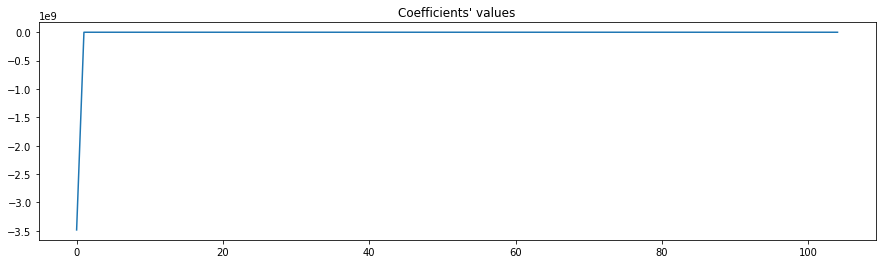

In [6]:
plot_coef(lr.coef_)

The coefficients in a combination with the error values on train and test suggest that we deal here with overfitting of the model on the given set of polynomial features. We should therefore use regularization. 

## Standardization

Before fitting any regularized model scaling of features is crucial. Otherwise the regularization would not be fair to features of different scales. Regularized linear models assume that the inputs to the model have zero mean and a variance in the same magnitude. StandarScaler() deducts mean and divides by a standard deviation. 

### Exercise

- instantiate StandardScaler() under the name scaler
- fit_transform x_train_poly with a scaler and store the result into x_train_scaled
- once the scaler is fit to x_train_poly you can directly transform x_test_poly with the scaler and store into variable X_test_scaled. You never want to fit on a test sample not to leak information from test data. Test data serves only for evaluation.

In [7]:
# Task


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_poly)
X_test_scaled = scaler.transform(x_test_poly)

If you applied standardization correctly you should see on the bottom chart distributions of all the features concentrated around zero with similar ranges of deviation

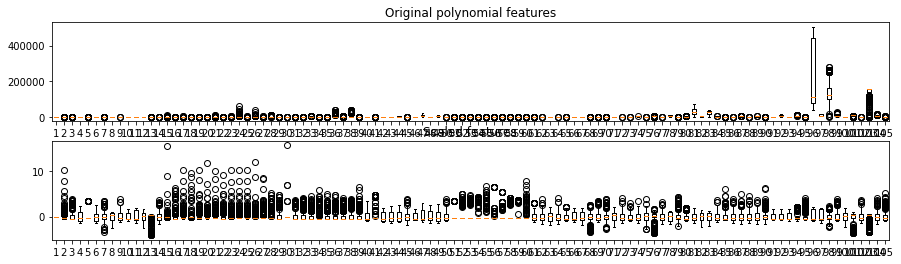

In [8]:
plt.subplot(2,1,1)
plt.title('Original polynomial features')
plt.boxplot(x_train_poly)

plt.subplot(2,1,2)
plt.title('Scaled features')
plt.boxplot(X_train_scaled)

plt.show()

# Lasso
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Exercise
- instantiate Lasso regression under the name lr_l
- fit the model to X_train_scaled, y_train
- predict on X_train_scaled and X_test_scaled and store the predictions to y_hat_train and y_hat_test respectively
- Did the overfit change?


In [9]:
# Task


from sklearn.linear_model import Lasso

lr_l = Lasso()
lr_l.fit(X_train_scaled, y_train)

y_hat_train = lr_l.predict(X_train_scaled)
y_hat_test = lr_l.predict(X_test_scaled)

print(f"RMSE train: {mean_squared_error(y_train, y_hat_train, squared=False)}")
print(f"RMSE test: {mean_squared_error(y_test, y_hat_test, squared=False)}")

RMSE train: 4.840345089698578
RMSE test: 4.71451932483926


The performance seems to be comparable on train and test dataset. Hence, the model's generalization power is good now.

### Exercise

- use plot_coef() on the coefficients of the lasso model

AVG coef value: -0.0034975241402784496


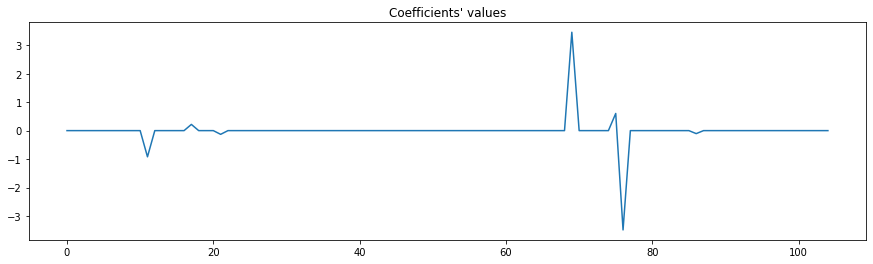

In [10]:
# Task

plot_coef(lr_l.coef_)

The average value of the coefficients is now much smaller. Also many of the coefficients are equal to 0.

In [11]:
print(f'After applying Lasso on polynomial scaled features we remain with {np.sum(lr_l.coef_!=0)} variables')
print('\nThe selected variables are:\n')
[print(val) for val in pd.DataFrame(poly_names)[lr_l.coef_!=0].values];
print('\nmapping from polynomial names to original feature names: ')
display(names_dict)

After applying Lasso on polynomial scaled features we remain with 7 variables

The selected variables are:

['PTRATIO']
['CRIM CHAS']
['CRIM DIS']
['RM^2']
['RM B']
['RM LSTAT']
['DIS TAX']

mapping from polynomial names to original feature names: 


{'x0': 'CRIM',
 'x1': 'ZN',
 'x2': 'INDUS',
 'x3': 'CHAS',
 'x4': 'NOX',
 'x5': 'RM',
 'x6': 'AGE',
 'x7': 'DIS',
 'x8': 'RAD',
 'x9': 'TAX',
 'x10': 'PTRATIO',
 'x11': 'B',
 'x12': 'LSTAT'}

### Exercise

- subset from X_train_scaled only those variables that have a non-zero coefficient and store the subset in the variable *x_train_lasso*
- do the same selection on X_test_scaled and save to *x_test_lasso*
- how many variables are remaining? Check it with the cell above

In [12]:
# Task

x_train_lasso = X_train_scaled[:,lr_l.coef_!=0]
x_test_lasso = X_test_scaled[:,lr_l.coef_!=0]
x_test_lasso.shape[1]

7

## Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

We have effectively performed a feature selection with Lasso. Now we will build on it and will use only the selected features in x_train_lasso, x_test_lasso. 

Let's try different values for the strength of the optimization, alpha. By default it is equal to 1 and it must be a positive value. Larger values specify stronger regularization. Alpha can be set also in Lasso and Elastic Net.

### Exercise
- fit the ridge regression to x_train_lasso, y_train with the values of alpha 0.001, 0.01, 0.1, 1, 10, 100 to see the effect of the regularization strength.
- return RMSE for x_train_lasso for each of the alpha options
- select a parameter alpha for which the model has the best RMSE 

The lowest RMSE on a train set is 4.39 with the alpha = 0.001


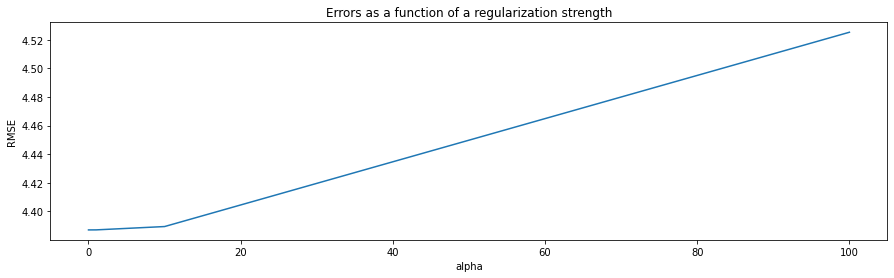

In [13]:
# Task

rmses = []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:    
    lr_r = Ridge(alpha=alpha)
    lr_r.fit(x_train_lasso, y_train)
    y_hat_train = lr_r.predict(x_train_lasso)
    rmses.append(mean_squared_error(y_train, y_hat_train, squared=False))

plt.title('Errors as a function of a regularization strength')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.plot(alphas, rmses);
print(f'The lowest RMSE on a train set is {np.round(np.min(rmses),2)} with the alpha = {alphas[np.argmin(rmses)]}')

### Exercise
- fit the model with the best performance on train data
- calculate RMSE on the x_test_lasso for the best model

In [14]:
# Task

lr_r_best = Ridge(alpha=alphas[np.argmin(rmses)]).fit(x_train_lasso, y_train)
y_hat_test = lr_r_best.predict(x_test_lasso)
rmse_test = np.round(mean_squared_error(y_test, y_hat_test, squared=False))
print(f"RMSE test: {np.round(rmse_test,2)}")

RMSE test: 5.0


RMSES on the train and the test set are similar.

### Exercise
- use the function plot_coef on the coefficients from the best model to see the coefficients values with their average

AVG coef value: -0.20231314182924182


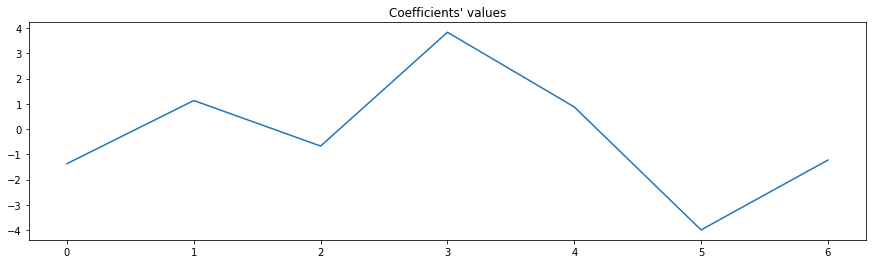

In [15]:
# Task

plot_coef(lr_r_best.coef_)

# Elastic Net

Elastic Net is a combination of Lasso and Ridge which is defined by a parameter l1_ratio. If it is equal to 1 the model is equivalent to Lasso, if it is 0 then it is as if we had Ridge regression. Regularization strength alpha can be defined as in Ridge or Lasso. 

You can enforce the values of the parameters to be positive with the parameter positive = True. Such an option is also available for Lasso. 

For all the variations of the linear regression you can enforce it to fit the model without an intercept. This can be done by setting the parameter fit_intercept=False

There is an option to scale data by the norm of each feature. If normalization is applied to fitting of the model it is automatically also applied to the predict(). We can use this method instead of standard scaling done at the beginning. 


### Exercise

- experiment with the parameters of ElasticNet. Fit the model to x_train_lasso, y_train with different set of options, e.g.
    - positive=True
    - fit_intercept=False
    - l1_ratio = 0, 0.5, 1
    - alpha = 0.001, 0.01, 0.1, 1, 10, 100
    - normalize=True
- plot coefficients with a function plot_coef to see the effect on coefficients
- return RMSE on train and test 

AVG coef value: 0.8833210169909257


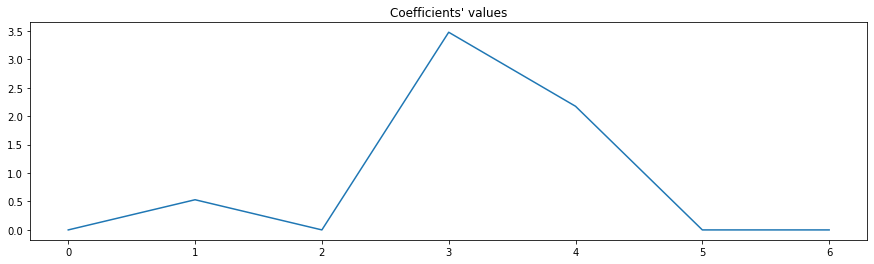

RMSE train: 23.770586692220583
RMSE test: 23.408794247573393


In [16]:
# Task

lr_en = ElasticNet(l1_ratio=0.5, alpha=1, positive=True, fit_intercept=False)
lr_en.fit(x_train_lasso, y_train)
plot_coef(lr_en.coef_)

y_hat_train = lr_en.predict(x_train_lasso)
y_hat_test = lr_en.predict(x_test_lasso)


rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)

print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

------------------------------------------------------------------------------------------------------------
Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)